## Lecture 20-21 Bayesian Analysis

### Outline
* In this lecture, we apply three different methods to estimate AR(1) coeffients -- Maximum Likelihood, OLS and Bayesian Analysis. Here, we use the time series data of GDP and takes the first order differentiation of logGDP to create a series that approximately follows AR(1).
* AR(1): $X_t =\mu + \phi X_{t-1} + \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0,\sigma^2), i.i.d.$
    * Coefficients are $\mu$ and $\phi$



Import all the libraries required in this lecture.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.tsatools import lagmat2ds
from scipy import stats
import matplotlib.pyplot as plt

**Load the data**
* We use pandas library to read files. The method name corresponds to the type of file. e.g. For excel files: pd.ExcelFile; for cvs files: pd.cvs.
* The argument of pd.ExcelFile is the path of the target file. Here, we use a relative path.

In [2]:
xl = pd.ExcelFile('GDPC1.xls')

Print sheet name

In [3]:
print(xl.sheet_names)

['FRED Graph']


Load the sheet into a DataFrame named "df1"

In [4]:
df1 = xl.parse('FRED Graph')

Set up dates
* df1['variable name']: input the name of that column as specified in the excel file
* Calling print(date), we can find the data type of the loaded data (each element) is automatically recognized as datetime. "dtype: datetime64[ns]"
* Calling type(date) to check the data type of "date". It is pandas.core.series.Series. So we must convert it into numpy.array for further computation.

In [5]:
date = df1['Date']
print(date) # python can automatically recognize the datatype as datetime
type(date)

0     1947-01-01
1     1947-04-01
2     1947-07-01
3     1947-10-01
4     1948-01-01
5     1948-04-01
6     1948-07-01
7     1948-10-01
8     1949-01-01
9     1949-04-01
10    1949-07-01
11    1949-10-01
12    1950-01-01
13    1950-04-01
14    1950-07-01
15    1950-10-01
16    1951-01-01
17    1951-04-01
18    1951-07-01
19    1951-10-01
20    1952-01-01
21    1952-04-01
22    1952-07-01
23    1952-10-01
24    1953-01-01
25    1953-04-01
26    1953-07-01
27    1953-10-01
28    1954-01-01
29    1954-04-01
         ...    
250   2009-07-01
251   2009-10-01
252   2010-01-01
253   2010-04-01
254   2010-07-01
255   2010-10-01
256   2011-01-01
257   2011-04-01
258   2011-07-01
259   2011-10-01
260   2012-01-01
261   2012-04-01
262   2012-07-01
263   2012-10-01
264   2013-01-01
265   2013-04-01
266   2013-07-01
267   2013-10-01
268   2014-01-01
269   2014-04-01
270   2014-07-01
271   2014-10-01
272   2015-01-01
273   2015-04-01
274   2015-07-01
275   2015-10-01
276   2016-01-01
277   2016-04-

pandas.core.series.Series

In [6]:
date = np.array(date)

Set up GDP time series and take the first order differentiation

In [7]:
gdp = df1['GDPC1']
print(gdp)
type(gdp)
gdp = np.array(gdp)

0       1934.5
1       1932.3
2       1930.3
3       1960.7
4       1989.5
5       2021.9
6       2033.2
7       2035.3
8       2007.5
9       2000.8
10      2022.8
11      2004.7
12      2084.6
13      2147.6
14      2230.4
15      2273.4
16      2304.5
17      2344.5
18      2392.8
19      2398.1
20      2423.5
21      2428.5
22      2446.1
23      2526.4
24      2573.4
25      2593.5
26      2578.9
27      2539.8
28      2528.0
29      2530.7
        ...   
250    14402.5
251    14541.9
252    14604.8
253    14745.9
254    14845.5
255    14939.0
256    14881.3
257    14989.6
258    15021.1
259    15190.3
260    15291.0
261    15362.4
262    15380.8
263    15384.3
264    15491.9
265    15521.6
266    15641.3
267    15793.9
268    15747.0
269    15900.8
270    16094.5
271    16186.7
272    16269.0
273    16374.2
274    16454.9
275    16490.7
276    16525.0
277    16583.1
278    16727.0
279    16804.1
Name: GDPC1, Length: 280, dtype: float64


In [8]:
# Y = 400 * delta log GDP
Y = 400 * (np.log(gdp[1:])-np.log(gdp[0:-1]))

**Method1: arima package in python (MLE)**
* Set trend = 'c' to include estimation of constant. Note that the "constant" estimated by sm.tsa.ARMA.fit() is the constant in the IRF form:  

$X_t = \frac {\mu} {1-\phi} + \sum_{j=0}^\infty \phi^j \epsilon_{t-j}$, which is actually $\frac {\mu} {1-\phi}$.

In [13]:
sm.tsa.ARMA.fit?

In [10]:
ar1_model         = sm.tsa.ARMA(Y, (1, 0)).fit(trend='c', disp=0)

c_arima_esti      = ar1_model.params[0]

phi_arima_esti    = ar1_model.params[1]

mu_arima_esti     = c_arima_esti * (1-phi_arima_esti)

c_arima_CI        = ar1_model.conf_int()[0] # extract confidence interval 95%

mu_arima_CI       = [c_arima_CI[0]*(1-phi_arima_esti),c_arima_CI[1]*(1-phi_arima_esti)]

phi_arima_CI      = ar1_model.conf_int()[1] 

sigma2_arima_esti = ar1_model.sigma2

llf_arima_esti    = ar1_model.llf

print(ar1_model.summary())

mu_arima_results = [mu_arima_esti, mu_arima_CI]
phi_arima_results = [phi_arima_esti, phi_arima_CI]
pd.DataFrame({'mu': mu_arima_results,'phi':phi_arima_results}, index=['ML estimation', '95% condifence interval'])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  279
Model:                     ARMA(1, 0)   Log Likelihood                -746.193
Method:                       css-mle   S.D. of innovations              3.509
Date:                Thu, 11 Apr 2019   AIC                           1498.386
Time:                        16:51:11   BIC                           1509.280
Sample:                             0   HQIC                          1502.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0891      0.334      9.256      0.000       2.435       3.743
ar.L1.y        0.3719      0.056      6.697      0.000       0.263       0.481
                                    Roots           

,mu,phi
ML estimation,1.94039,0.371868
95% condifence interval,"[1.5295077894718632, 2.3512721295137022]","[0.2630368628445635, 0.4807000174593087]"


**Method 2: OLS estimation of the AR(1) parameters**
* `lagmat2ds(x,maxlag0)`(statsmodels.tsa.tsatools.lagmat2ds): Generate lagmatrix for 2d array, columns arranged by variables(each column is a series of data starting from a certain lag). x is the original data. maxlag0 is the maximum lags to generate (including lag 0). See Example 1.
* `np.concatenate((a,b,c), axis = 0)`: Join a number of matrices or arrays (three matrix a,b,c in this example) into one matrix. axis = 0 denotes joining by rows; axis = 1 denotes joining by columns. See Example 2.
* `statsmodels.api.OLS()`: 
    * Here we need to include the constant term (estimation of $\mu$) in the regression by genrating a vector of 1s.

**Example 1**
* Be careful: For time lags where there lack data, python replace them with 0, not None!

In [45]:
max_lag = 4

X = np.array([1,2,3,4,5,6,7])
Xlag = lagmat2ds(x=X, maxlag0=max_lag)
pd.DataFrame(Xlag, index = ['t=1','t=2','t=3','t=4','t=5','t=6','t=7'])

,0,1,2,3,4
t=1,1.0,0.0,0.0,0.0,0.0
t=2,2.0,1.0,0.0,0.0,0.0
t=3,3.0,2.0,1.0,0.0,0.0
t=4,4.0,3.0,2.0,1.0,0.0
t=5,5.0,4.0,3.0,2.0,1.0
t=6,6.0,5.0,4.0,3.0,2.0
t=7,7.0,6.0,5.0,4.0,3.0


**Example 2**

In [46]:
a = np.matrix(np.arange(10).reshape((2,5)))
print(a)

b = np.matrix(np.arange(5))
print(b)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]]


In [47]:
c = np.concatenate((a,b), axis = 0)
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]
 [0 1 2 3 4]]


OLS estimation

In [14]:
Y_endog = Y[1:]

Ylag    = np.transpose(np.matrix(lagmat2ds(x=Y, maxlag0=1)[1:,1])) # exclude the first missing point
                                                                   # convert into matrix to match the datatype of mu_aux in order for concatenation
mu_aux  = np.transpose(np.matrix(np.ones(len(Ylag))))

exogen  = np.array(np.concatenate((mu_aux, Ylag), axis=1))

OLS_reg = sm.OLS(endog=Y_endog, exog=exogen)

results = OLS_reg.fit()

print(results.summary())

mu_OLS     = results.params[0]
phi_OLS    = results.params[1]
mu_OLS_CI  = results.conf_int()[0]
phi_OLS_CI = results.conf_int()[1]
sigma2_OLS = results.scale

mu_OLS_results  = [mu_OLS, mu_OLS_CI]
phi_OLS_results = [phi_OLS, phi_OLS_CI]
pd.DataFrame({'mu': mu_OLS_results,'phi':phi_OLS_results}, index=['OLS estimation', '95% condifence interval'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     44.48
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.40e-10
Time:                        17:07:14   Log-Likelihood:                -743.50
No. Observations:                 278   AIC:                             1491.
Df Residuals:                     276   BIC:                             1498.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9574      0.273      7.166      0.0

,mu,phi
OLS estimation,1.95744,0.372012
95% condifence interval,"[1.4197247700560096, 2.4951463441405695]","[0.26219828357075614, 0.481824878893371]"


**Method 3: Bayesian Decision Rules**

* `More on the datatype: "class"`
    * In lecture 11-12, we introduced how to define a class in python and how to create an **instance** from a class (simply "call" the name of the class).
    * Each class has a number of **attributes**. There are two types of attributes:
       * **Datafield**: Basically, it is a **variable** that attached to a certain class. (There is a significant distinction between names (variables) and the objects they refer to. A variable in python means the name of the object. e.g. "a = 2": "a" is a variable, the name of the **object**; 2 is the **value** of this object.)
       * **Method**: It is a function that attached to a certain class. e.g. $__init__ $ is an inbuilt method in python.
       * In other words, a datafield is the name of an object that simply has certain value, whereas a method is a definition for operations that can be performed on objects of this type (class). But in its essence, they are all attributes of a class.
       * Except for inbuilt attributes in python, we can also define new attributes for a class catering our needs. We can define a datafield either in the main body of the class or after an instance is created (See below how we define the datafield named "Yreg" for the instance named "Bayes"; simply assign a value to it). However, to creat a method, we must define it in the main body of the class (currently we do not need this).
    

Define a class BayesAnalysis() to store estimation results and create an instance named "Bayes"
* `object` is the name of the parent class (We use "self" in lecture 11-12. Currently just take them as the same.)
* `pass` indicates that the body/suit of the class definition is empty.

In [49]:
class BayesAnalysis(object):
    pass

Bayes = BayesAnalysis()

Check the attributes of Bayes.

In [50]:
dir(Bayes)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

Set up Gaussian Prior and Prior Hyperparameter

In [51]:
# Gaussian Prior
Bayes.Yreg = np.transpose(np.matrix(Y[1:]))

x_aux1     = np.transpose(np.matrix(np.ones(len(Bayes.Yreg)))) # x_aux1 is an n by 1 matrix

x_aux2     = np.transpose(np.matrix(Y[0:-1]))

Bayes.Xreg = np.concatenate((x_aux1, x_aux2), axis=1)

# Prior Hyperparameter
Bayes.V = np.matrix(np.identity(np.shape(Bayes.Xreg)[1])) # creat an identity matrix

Again, check the attributes of Bayes. Now, we can find that Yreg, Xreg and V appear in the list of attributes. They are datafields that we have just defined.

In [52]:
dir(Bayes)

['V',
 'Xreg',
 'Yreg',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

Compute the mean of the posterior distribution.
* We assume $\mu$ = 0 in the prior and take the ML estimation of $\sigma^2$ as that in the prior

In [53]:
sigma2 = sigma2_arima_esti

Bayes.PostMean = np.linalg.inv(np.linalg.inv(Bayes.V) + np.transpose(Bayes.Xreg)*Bayes.Xreg)*\
(np.transpose(Bayes.Xreg)*Bayes.Yreg)

Bayes.mu_hat = Bayes.PostMean[0,0]
Bayes.phi_hat = Bayes.PostMean[1,0]

pd.DataFrame({'Bayes estimation':[Bayes.mu_hat,Bayes.phi_hat]}, index=(["mu","phi"]))

,Bayes estimation
mu,1.946024
phi,0.373433


Compute the Variance of the posterior distribution

In [54]:
Bayes.PostVar = sigma2*np.linalg.inv((np.linalg.inv(Bayes.V) + np.transpose(Bayes.Xreg)*Bayes.Xreg))

Compare the Prior for $\mu$ vs the posterior for $\mu$

Text(0.5, 1.0, 'Prior/Posterior of $\\mu$')

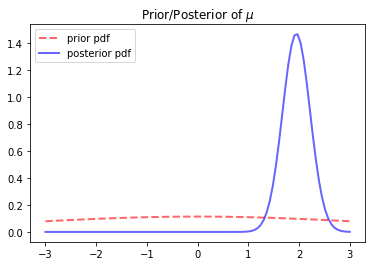

In [55]:
mu_lim = np.linspace(-3, 3, 100)

mu_prior_pdf = stats.norm.pdf(mu_lim,loc=0, scale= sigma2**0.5)

mu_post_pdf  = stats.norm.pdf(mu_lim,loc= Bayes.mu_hat, scale= Bayes.PostVar[0,0]**0.5)

plt.plot(mu_lim, mu_prior_pdf, 'r--', lw=2, alpha=0.6) # alpha is the degree of transparency of the line

plt.plot(mu_lim, mu_post_pdf, 'b-', lw=2, alpha=0.6)   

plt.legend(['prior pdf','posterior pdf'], loc='upper left')

plt.title("Prior/Posterior of $\mu$")

Compare the Prior for $\phi$ vs the posterior for $\phi$

Text(0.5, 1.0, 'Prior/Posterior of $\\phi$')

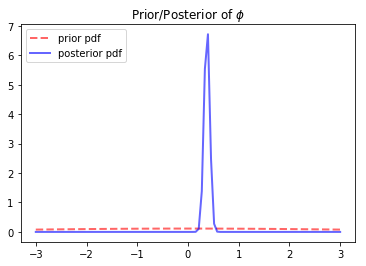

In [56]:
phi_lim = np.linspace(-3, 3, 100)

phi_prior_pdf = stats.norm.pdf(phi_lim,loc=0, scale= sigma2**0.5)

phi_post_pdf  = stats.norm.pdf(phi_lim,loc= Bayes.phi_hat, scale= Bayes.PostVar[1,1]**0.5)

plt.plot(phi_lim, phi_prior_pdf, 'r--', lw=2, alpha=0.6)

plt.plot(phi_lim, phi_post_pdf, 'b-', lw=2, alpha=0.6)   

plt.legend(['prior pdf','posterior pdf'], loc='upper left')

plt.title("Prior/Posterior of $\phi$")

Compute 95% Credible Sets based on the quantiles of the posterior
* stats.norm.ppf(p, loc, scale): Standard Normal inverse cumulative distribution function (percent point function)
    * p: quantile
    * loc: mean of the normal distribution
    * scale: standard error of the normal distribution

In [57]:
# Standard Normal inverse cumulative distribution function (percent point function)
Bayes.mu_CS = [stats.norm.ppf(0.025, loc=Bayes.mu_hat, scale=Bayes.PostVar[0,0]**0.5),\
               stats.norm.ppf(0.975, loc=Bayes.mu_hat, scale=Bayes.PostVar[0,0]**0.5)]

Bayes.phi_CS = [stats.norm.ppf(0.025, loc=Bayes.phi_hat, scale=Bayes.PostVar[1,1]**0.5),\
               stats.norm.ppf(0.975, loc=Bayes.phi_hat, scale=Bayes.PostVar[1,1]**0.5)]

print('The 95% credible set for mu and phi are', Bayes.mu_CS, "and", Bayes.phi_CS,".")

The 95% credible set for mu and phi are [1.4143327504258907, 2.4777157829396006] and [0.26466180472165624, 0.4822037657685321] .


Compare MLE, OLS and Bayes estimation.

In [58]:
# change the precision of confidence interval
mu_arima_CI[0]  = round(mu_arima_CI[0], 5) 
mu_arima_CI[1]  = round(mu_arima_CI[1], 5)
phi_arima_CI[0] = round(phi_arima_CI[0], 5) 
phi_arima_CI[1] = round(phi_arima_CI[1], 5)
mu_OLS_CI[0]    = round(mu_OLS_CI[0], 5) 
mu_OLS_CI[1]    = round(mu_OLS_CI[1], 5)
phi_OLS_CI[0]   = round(phi_OLS_CI[0], 5) 
phi_OLS_CI[1]   = round(phi_OLS_CI[1], 5)
Bayes.mu_CS[0]  = round(Bayes.mu_CS[0], 5) 
Bayes.mu_CS[1]  = round(Bayes.mu_CS[1], 5)
Bayes.phi_CS[0] = round(Bayes.phi_CS[0], 5) 
Bayes.phi_CS[1] = round(Bayes.phi_CS[1], 5)

# set the precision of pandas display
pd.set_option('display.precision', 6)

arima_results = [mu_arima_esti, mu_arima_CI, phi_arima_esti, phi_arima_CI]

OLS_results = [mu_OLS, mu_OLS_CI, phi_OLS, phi_OLS_CI]

Bayes.results = [Bayes.mu_hat, Bayes.mu_CS, Bayes.phi_hat, Bayes.phi_CS]

pd.DataFrame({'arma MLE':arima_results,'OLS':OLS_results,'Bayesian Analysis':Bayes.results},\
             index=['mu estimation', 'mu confidence interval/credit set', 'phi estimation', 'phi confidence interval/credit set'])


,arma MLE,OLS,Bayesian Analysis
mu estimation,1.94039,1.95744,1.94602
mu confidence interval/credit set,"[1.52951, 2.35127]","[1.41972, 2.49515]","[1.41433, 2.47772]"
phi estimation,0.371868,0.372012,0.373433
phi confidence interval/credit set,"[0.26304, 0.4807]","[0.2622, 0.48182]","[0.26466, 0.4822]"
